# Lista de Exercícios 7
**Aluno**: Vítor Gabriel Reis Caitité

1) Verifique se as seguintes distribuições pertencem à família exponencial e, caso afirmativo, encontre a sua função Desvio.

    a)  Bernoulli: $P(Y=y)= p^y(1−p)^{1−y}, Y \in \{0,1\} $


    A forma geral de uma distribuição pertencente à família exponencial é:

    $P(Y = y) = \exp\left(\frac{y \theta - b(\theta)}{a(\phi)} + c(y, \phi)\right)$

    - Aplicando logaritmo na expressão passada:

        $\log P(Y = y) = y \log(p) + (1 - y) \log(1 - p)$

    - Fazendo $\theta = log(\frac{p}{1-p})$, tem se $p=\frac{e^{\theta}}{1+e^{\theta}}$:
    
        $\log P(Y = y) = y \log(\frac{e^{\theta}}{1+e^{\theta}}) + (1 - y) \log(1 - p)$

        $\log P(Y = y) = y [\log(e^{\theta}) - \log(1+e^{\theta})] + (1 - y) \log(1 - p)$

        Sendo $log(p)= \theta − \log(1−p)$:

        $\log P(Y = y) = y [\theta - \log(1+e^{\theta})] + (1 - y) (\theta - log(p))$

        $\log P(Y = y) = y [\theta - \log(1+e^{\theta})] + (1 - y) [\theta - log(\frac{e^{\theta}}{1+e^{\theta}})]$

        $\log P(Y = y) = y [\theta - \log(1+e^{\theta})] + (1 - y) [\theta - log(e^{\theta}) - \log({1+e^{\theta}})]$

        $\log P(Y = y) = y [\theta - \log(1+e^{\theta})] + (1 - y) [-\log({1+e^{\theta}})]$

        $\log P(Y = y) = y\theta  -\log({1+e^{\theta}})$

        $P(Y = y) = \exp\left(y \theta - \log(1 + e^\theta)\right)$
    
    Assim, foi possível reorganizar a expressão para a forma canônica, logo a distribuição pertencente à família exponencial.

    ---

    b)  Binomial: $P(Y=y) = \binom{n}{y} p^y (1 - p)^{n-y}, Y \in \{0,1,...,n\}$


    A forma geral de uma distribuição pertencente à família exponencial é:

    $P(Y = y) = \exp\left(\frac{y \theta - b(\theta)}{a(\phi)} + c(y, \phi)\right)$

    - Aplicando logaritmo na expressão passada:

        $\log P(Y = y) = \log \binom{n}{y} + y \log(p) + (n - y) \log(1 - p)$

    - Fazendo $\theta = log(\frac{p}{1-p})$, tem se $p=\frac{e^{\theta}}{1+e^{\theta}}$:
    
        $\log P(Y = y) = \log \binom{n}{y} + y \log(\frac{e^{\theta}}{1+e^{\theta}}) + (n - y) \log(1 - p)$

        $\log P(Y = y) = \log \binom{n}{y} + y [\log(e^{\theta}) -\log({1+e^{\theta}})] + (n - y) \log(1 - p)$

        Sendo $log(p)= \theta − \log(1−p)$:

        $\log P(Y = y) = \log \binom{n}{y} + y [\theta -\log({1+e^{\theta}})] + (n - y) [\theta - \log(p)]$

        $\log P(Y = y) = \log \binom{n}{y} + y [\theta -\log({1+e^{\theta}})] + (n - y) [\theta - \theta - \log({1+e^{\theta}})]$

        $\log P(Y = y) = \log \binom{n}{y} + y\theta -y\log({1+e^{\theta}}) + (n - y) [-\log({1+e^{\theta}})]$

        $\log P(Y = y) = \log \binom{n}{y} + y\theta - n\log({1+e^{\theta}})]$

        $P(Y = y) = \exp\left[y \theta - n \log(1 + e^\theta) + \log \binom{n}{y}\right]$
    
    Assim, foi possível reorganizar a expressão para a forma canônica, logo a distribuição pertencente à família exponencial.

2) A base de dados “motorins.xlsx” está vinculada ao setor de seguros de veículos. Particularmente, a variável resposta “Claims” representa o número de
reclamos de uma seguradora. Desejamos ajustar um modelo para identificar os principais fatores associados ao número de reclamos, considerando a população de
interesse (Insured). Faça uma análise exploratório dos dados e ajuste um modelo linear generalizado de Poisson para a base de dados “motorins.xlsx”. Deve-se utilizar as seguintes variáveis:

        a. Kilometres: Kilômetros percorridos em um ano.
            1: less than 1000
            2: from 1000 to 15 000
            3: 15 000 to 20 000
            4: 20 000 to 25 000
            5: more than 25 000
        
        b. Zone: Região Geográfica (Zona).
            1: Stockholm, Göteborg, Malmö with surroundings
            2: Other large cities with surroundings
            3: Smaller cities with surroundings in southern Sweden
            4: Rural areas in southern Sweden
            5: Smaller cities with surroundings in northern Sweden
            6: Rural areas in northern Sweden
            7: Gotland

        c. Bonus: Igual ao número de anos sem reclamos mais 1.

        d. Make: Representa 8 tipos de modelos de automóveis mais o tipo 9 (outros)
        
        e. Insured: Número de veículos segurados
        
        f. Claims: Número de reclamos

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from math import *
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [18]:
dataset = pd.read_csv('~/Documents/UFMG/Doutorado/materias/parametric-and-nonparametric-regression-models/exercise_7/dataset.csv', header=0, sep=",", engine='python')
dataset = dataset.dropna()
dataset.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


In [19]:
# Transformar a variável 'Kilometres' em variáveis one-hot
Kilometres_mapping = {
    1: 'Less_than_1000',
    2: '1000_to_15000',
    3: '15000_to_20000',
    4: '20000_to_25000',
    5: 'More_than_25000'
}

dataset['Kilometres'] = dataset['Kilometres'].map(Kilometres_mapping)
dataset_km_encoded = pd.get_dummies(dataset['Kilometres'], prefix='Kilometres', drop_first=True).astype(float)

# Transformar a variável 'Zone' em variáveis one-hot
zone_mapping = {
    1: 'Stockholm_Gothenburg_Malmo',
    2: 'Other_large_cities',
    3: 'Smaller_cities_south_Sweden',
    4: 'Rural_areas_south_Sweden',
    5: 'Smaller_cities_north_Sweden',
    6: 'Rural_areas_north_Sweden',
    7: 'Gotland'
}

dataset['Zone'] = dataset['Zone'].map(zone_mapping)
dataset_zone_encoded = pd.get_dummies(dataset['Zone'], prefix='Zone', drop_first=True).astype(float)

# Transformar a variável 'Make' em variáveis one-hot
make_mapping = {
    1: 'Make_1',
    2: 'Make_2',
    3: 'Make_3',
    4: 'Make_4',
    5: 'Make_5',
    6: 'Make_6',
    7: 'Make_7',
    8: 'Make_8',
    9: 'Other'
}

dataset['Make'] = dataset['Make'].map(make_mapping)
dataset_make_encoded = pd.get_dummies(dataset['Make'], prefix='Make', drop_first=True).astype(float)

# Concatenar as variáveis one-hot ao dataframe original
dataset_encoded = pd.concat([dataset, dataset_km_encoded, dataset_zone_encoded, dataset_make_encoded], axis=1)

# Excluir as variáveis originais que foram mapeadas
dataset = dataset_encoded.drop(['Kilometres', 'Zone', 'Make'], axis=1)

# Exibir o dataframe resultante
dataset.head(5)

,Bonus,Insured,Claims,Payment,Kilometres_15000_to_20000,Kilometres_20000_to_25000,Kilometres_Less_than_1000,Kilometres_More_than_25000,Zone_Other_large_cities,Zone_Rural_areas_north_Sweden,...,Zone_Smaller_cities_south_Sweden,Zone_Stockholm_Gothenburg_Malmo,Make_Make_2,Make_Make_3,Make_Make_4,Make_Make_5,Make_Make_6,Make_Make_7,Make_Make_8,Make_Other
0,1,455.13,108,392491,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,69.17,19,46221,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,72.88,13,15694,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1292.39,124,422201,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,191.01,40,119373,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Selecionando as variáveis de ambiente requeridas:
population = dataset["Insured"] 
y = dataset["Claims"]
X = dataset.drop(columns=["Insured", "Claims", "Payment"])
X.head(5)

,Bonus,Kilometres_15000_to_20000,Kilometres_20000_to_25000,Kilometres_Less_than_1000,Kilometres_More_than_25000,Zone_Other_large_cities,Zone_Rural_areas_north_Sweden,Zone_Rural_areas_south_Sweden,Zone_Smaller_cities_north_Sweden,Zone_Smaller_cities_south_Sweden,Zone_Stockholm_Gothenburg_Malmo,Make_Make_2,Make_Make_3,Make_Make_4,Make_Make_5,Make_Make_6,Make_Make_7,Make_Make_8,Make_Other
0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Análise Exploratória

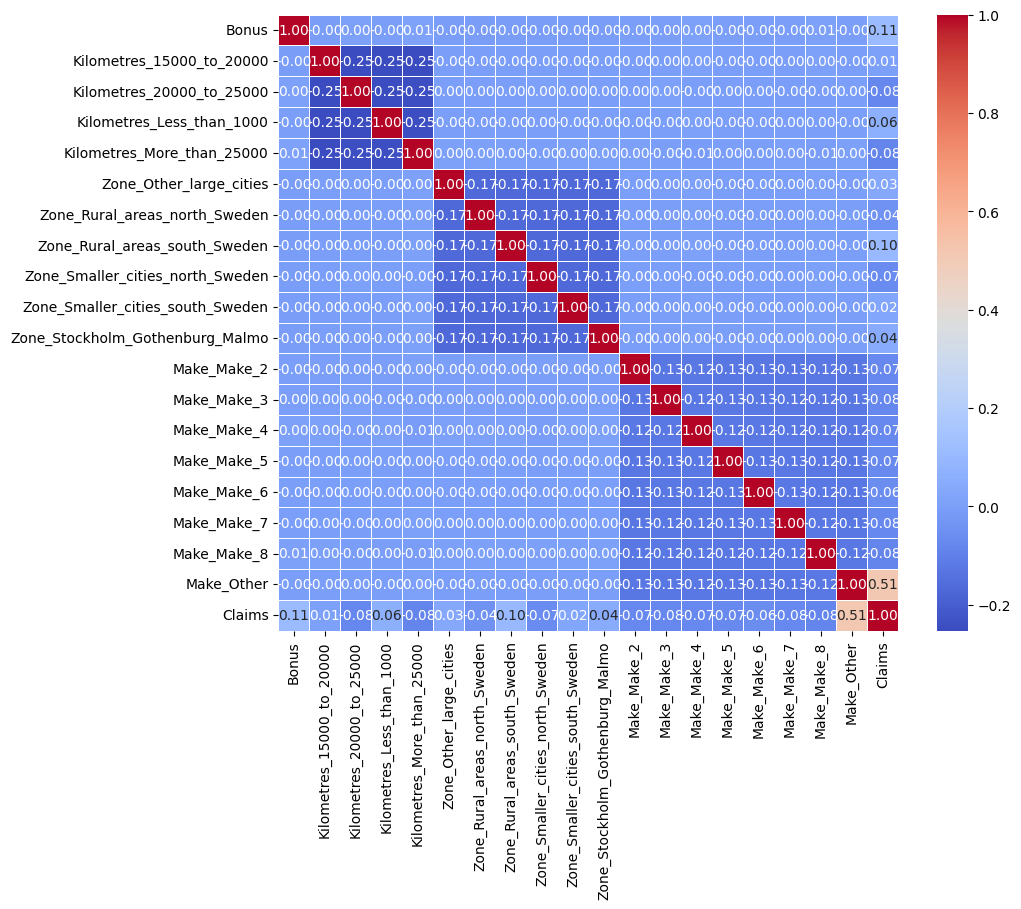

In [21]:
dataset =  pd.concat([X, y], axis=1)
correlation_matrix = dataset.corr()

# Mapa de calor da correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [22]:
# Calcular VIF para as variáveis independentes
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                            Variable       VIF
0                              Bonus  4.128742
1          Kilometres_15000_to_20000  1.787088
2          Kilometres_20000_to_25000  1.784419
3          Kilometres_Less_than_1000  1.786284
4         Kilometres_More_than_25000  1.779087
5            Zone_Other_large_cities  1.732660
6      Zone_Rural_areas_north_Sweden  1.732660
7      Zone_Rural_areas_south_Sweden  1.732660
8   Zone_Smaller_cities_north_Sweden  1.726356
9   Zone_Smaller_cities_south_Sweden  1.732660
10   Zone_Stockholm_Gothenburg_Malmo  1.732660
11                       Make_Make_2  1.616758
12                       Make_Make_3  1.617207
13                       Make_Make_4  1.611057
14                       Make_Make_5  1.616187
15                       Make_Make_6  1.617265
16                       Make_Make_7  1.616126
17                       Make_Make_8  1.616960
18                        Make_Other  1.616758


Pelos valores de VIF não é possível observar uma multicolinearidade grave (VIF>10) para nenhuma variável.

## Modelo linear generalizado de Poisson

### Ajustar o modelo GLM com família Poisson

In [23]:
X = pd.DataFrame(X)
#formula = "Claims ~ Kilometres + Zone + Bonus + Make + Insured"
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Poisson(), exposure=population).fit()
# Resumo do modelo
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Claims   No. Observations:                 2182
Model:                            GLM   Df Residuals:                     2162
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5831.5
Date:                Mon, 03 Feb 2025   Deviance:                       4025.1
Time:                        23:10:01   Pearson chi2:                 4.07e+03
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Análise do modelo

#### Actual vs. Predicted Values



Este gráfico ajuda a visualizar o quão bem as previsões do modelo se alinham com os valores reais.

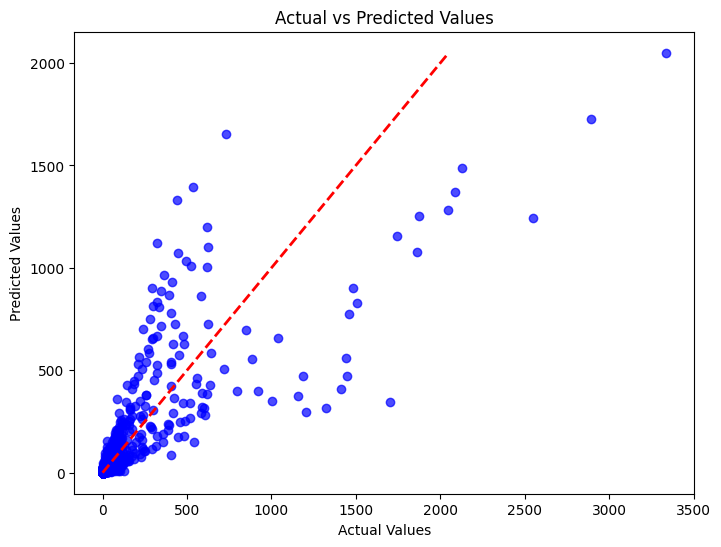

In [24]:
# Predictions
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
y_pred = model.predict(X)

# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color="blue")
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


#### Coefficient Importance (Feature Weights)



A intenção do plot abaixo é observar a importância de cada coeficiente do nosso modelo. Ele exibe os coeficientes associados às variáveis preditoras ($Xi$) do modelo, indicando sua contribuição relativa para o resultado ($y$).

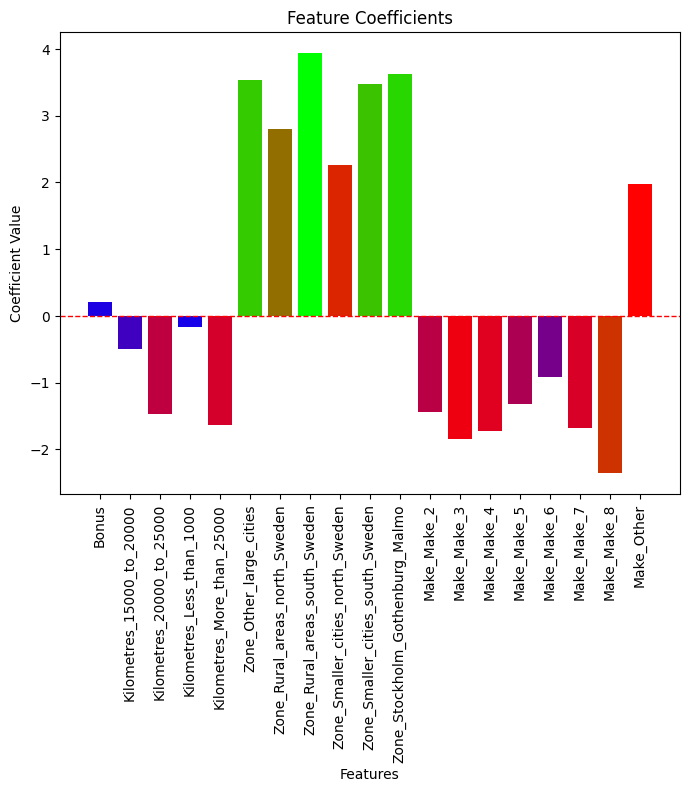

In [25]:
coefficients = model.params[1:]  
features = X.columns[1:]  

# Define colors based on magnitude
colors = coefficients.abs()  
colors = colors/colors.max()  

# Plot coefficients
plt.figure(figsize=(8, 6))
bars = plt.bar(features, coefficients, color=plt.cm.brg(colors))
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.show()

### Avaliação utilizando validação cruzada

In [26]:
# Função para calcular Pseudo R² (usando a log-verossimilhança)
def pseudo_r2(y_true, y_pred):
    # Log-verossimilhança para o modelo nulo
    log_likelihood_null = np.sum(y_true * np.log(np.mean(y_true)) - np.mean(y_true))
    # Log-verossimilhança para o modelo com as previsões
    log_likelihood_model = np.sum(y_true * np.log(y_pred) - y_pred)
    # Pseudo R²
    return 1 - (log_likelihood_model / log_likelihood_null)


# Função para realizar a validação cruzada com GLM
def cross_val_score(X, y, population, family, cv=10):
    r2_scores = []
    chi2_scores = []
    mae_scores = []
    rmse_scores = []
    for train_index, val_index in KFold(n_splits=cv).split(X):
        population_train_cv, population_test_cv = population.iloc[train_index], population.iloc[val_index]
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
        
        # Ajustar o modelo GLM
        model = sm.GLM(y_train_cv, X_train_cv, family=family(link=sm.families.links.log()), exposure=population_train_cv)
        result = model.fit(maxiter=10000, tol=1e-6)
        
        # Prever e calcular o R² nos dados de validação
        y_pred = result.predict(X_val_cv, exposure=population_test_cv)
        r2_scores.append(pseudo_r2(y_val_cv, y_pred))  # R² para o modelo
        chi2_scores.append(result.pearson_chi2)
        mae_scores.append(mean_absolute_error(y_val_cv, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_pred)))
    return r2_scores, chi2_scores, mae_scores, rmse_scores

r2_scores, chi2_scores, mae_scores, rmse_scores = cross_val_score(X, y, population, sm.families.Poisson)
print(f"Pseudo R² média +/- desvio padrão (validação cruzada): {round(np.mean(r2_scores), 4)} +/- {round(np.std(r2_scores), 4)}")
print(f"Pearson Chi² média +/- desvio padrão (validação cruzada): {round(np.mean(chi2_scores), 4)} +/- {round(np.std(chi2_scores), 4)}")
print(f"MAE média +/- desvio padrão (validação cruzada): {round(np.mean(mae_scores), 4)} +/- {round(np.std(mae_scores), 4)}")
print(f"RMSE média +/- desvio padrão (validação cruzada): {round(np.mean(rmse_scores), 4)} +/- {round(np.std(rmse_scores), 4)}")

Pseudo R² média +/- desvio padrão (validação cruzada): -0.7263 +/- 0.2829
Pearson Chi² média +/- desvio padrão (validação cruzada): 3650.7262 +/- 195.6943
MAE média +/- desvio padrão (validação cruzada): 6.5419 +/- 4.4353
RMSE média +/- desvio padrão (validação cruzada): 18.1201 +/- 13.119


Como pode ser visto abaixo, os dados apresentam superdispersão (variância maior que a média), nesse caso o modelo de Poisson pode não ser adequado. Assim, é comum usar a regressão de Quasi-Poisson ou de Distribuição Binomial Negativa.


In [27]:
media = np.mean(y)
variancia = np.var(y, ddof=1)  # ddof=1 para variância amostral

print("Média:", media)
print("Variância:", variancia)
print("Razão Variância/Média:", variancia/media)

Média: 51.86571952337305
Variância: 40687.20387703822
Razão Variância/Média: 784.4719836327098


In [28]:
# Usando o modelo binomial negativa
r2_scores, chi2_scores, mae_scores, rmse_scores = cross_val_score(X, y, population, sm.families.NegativeBinomial)
print(f"Pseudo R² média +/- desvio padrão (validação cruzada): {round(np.mean(r2_scores), 4)} +/- {round(np.std(r2_scores), 4)}")
print(f"Pearson Chi² média +/- desvio padrão (validação cruzada): {round(np.mean(chi2_scores), 4)} +/- {round(np.std(chi2_scores), 4)}")
print(f"MAE média +/- desvio padrão (validação cruzada): {round(np.mean(mae_scores), 4)} +/- {round(np.std(mae_scores), 4)}")
print(f"RMSE média +/- desvio padrão (validação cruzada): {round(np.mean(rmse_scores), 4)} +/- {round(np.std(rmse_scores), 4)}")

Pseudo R² média +/- desvio padrão (validação cruzada): -0.7258 +/- 0.2828
Pearson Chi² média +/- desvio padrão (validação cruzada): 571.4679 +/- 37.6475
MAE média +/- desvio padrão (validação cruzada): 7.4441 +/- 5.5006
RMSE média +/- desvio padrão (validação cruzada): 22.7831 +/- 16.3046


In [29]:
# Usando o modelo binomial negativa
r2_scores, chi2_scores, mae_scores, rmse_scores = cross_val_score(X, y, population, sm.families.NegativeBinomial)
print(f"Pseudo R² média +/- desvio padrão (validação cruzada): {round(np.mean(r2_scores), 4)} +/- {round(np.std(r2_scores), 4)}")
print(f"Pearson Chi² média +/- desvio padrão (validação cruzada): {round(np.mean(chi2_scores), 4)} +/- {round(np.std(chi2_scores), 4)}")
print(f"MAE média +/- desvio padrão (validação cruzada): {round(np.mean(mae_scores), 4)} +/- {round(np.std(mae_scores), 4)}")
print(f"RMSE média +/- desvio padrão (validação cruzada): {round(np.mean(rmse_scores), 4)} +/- {round(np.std(rmse_scores), 4)}")

Pseudo R² média +/- desvio padrão (validação cruzada): -0.7258 +/- 0.2828
Pearson Chi² média +/- desvio padrão (validação cruzada): 571.4679 +/- 37.6475
MAE média +/- desvio padrão (validação cruzada): 7.4441 +/- 5.5006
RMSE média +/- desvio padrão (validação cruzada): 22.7831 +/- 16.3046


In [30]:
model = sm.GLM(y, X, family=sm.families.NegativeBinomial(), exposure=population).fit()

# Resumo do modelo
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Claims   No. Observations:                 2182
Model:                            GLM   Df Residuals:                     2162
Model Family:        NegativeBinomial   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6549.9
Date:                Mon, 03 Feb 2025   Deviance:                       601.55
Time:                        23:10:10   Pearson chi2:                     636.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1782
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [31]:
def remove_high_p_values(model, X, y, population, threshold=0.05):
    p_values = model.pvalues
    high_p_vars = p_values[p_values > threshold].index.tolist()
    while len(high_p_vars) > 0:
        X_new = X.drop(columns=high_p_vars)
        model = sm.GLM(y, X_new, family=sm.families.NegativeBinomial(), exposure=population).fit()
        p_values = model.pvalues
        high_p_vars = p_values[p_values > threshold].index.tolist()
    return model

model_refined = remove_high_p_values(model, X, y, population)
print(model_refined.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Claims   No. Observations:                 2182
Model:                            GLM   Df Residuals:                     2171
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6556.5
Date:                Mon, 03 Feb 2025   Deviance:                       614.71
Time:                        23:10:10   Pearson chi2:                     632.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1732
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [33]:
from pygam import PoissonGAM

# Criar o modelo PoissonGAM
model = PoissonGAM()

# Configurar a validação cruzada (K-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para armazenar as métricas
r2_scores = []
chi2_scores = []
mae_scores = []
rmse_scores = []

X=X.to_numpy()

# Loop de validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Ajustar o modelo aos dados de treino
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular métricas
    pseudo_r2 = model.statistics_['pseudo_r2']['explained_deviance']
    chi2 = np.sum((y_test - y_pred) ** 2 / (y_pred + 1e-6))  # Pearson Chi²
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Armazenar os resultados
    r2_scores.append(pseudo_r2)
    chi2_scores.append(chi2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Exibir os resultados
print(f"Pseudo R² média +/- desvio padrão (validação cruzada): {round(np.mean(r2_scores), 4)} +/- {round(np.std(r2_scores), 4)}")
print(f"Pearson Chi² média +/- desvio padrão (validação cruzada): {round(np.mean(chi2_scores), 4)} +/- {round(np.std(chi2_scores), 4)}")
print(f"MAE média +/- desvio padrão (validação cruzada): {round(np.mean(mae_scores), 4)} +/- {round(np.std(mae_scores), 4)}")
print(f"RMSE média +/- desvio padrão (validação cruzada): {round(np.mean(rmse_scores), 4)} +/- {round(np.std(rmse_scores), 4)}")

Pseudo R² média +/- desvio padrão (validação cruzada): 0.9664 +/- 0.0026
Pearson Chi² média +/- desvio padrão (validação cruzada): 3551.5575 +/- 1009.286
MAE média +/- desvio padrão (validação cruzada): 13.1148 +/- 1.9568
RMSE média +/- desvio padrão (validação cruzada): 45.4888 +/- 11.8673
